<a href="https://colab.research.google.com/github/SachiSachu/Nitg/blob/main/balanced_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import os

def loadbal(edgeco, iotco, edges, iot, loadiot):
  dist = []                                   #this dist array is to store euclidean distance between edge devices and iot devices
  for i in range(iot):                        #this loop is to calculate the distance
    ar1 = []
    for j in range(edges):
      x1 = (iotco[i][0]-edgeco[j][0])**2 + (iotco[i][1]-edgeco[j][1])**2    #euclidean distance formula sqrt( (x2-x1)^2 + (y2-y1)^2 ).... 
                                                                          #but here we have not calculated square root..it is done in the next line
      ar1.append(int(math.sqrt(x1)))                                        #here we have stored suqare root of (x2-x1)^2 + (y2-y1)^2
    dist.append(ar1)
  #print(np.array(dist))
                               
  conn = []                                                                 
                                                                          
  for i in range(iot):
    ar1 = []
    for j in range(edges):
      if dist[i][j] <=lim:
        ar1.append(1)
      else:
        ar1.append(0)
    conn.append(ar1)
  #print("connection array:",np.array(conn))

  bucket = []                               #this bucket holds the device info which one connected to which edge devices
  for m in range(edges):
    ab = []
    bucket.append(ab)
  nonconn = []
  for i in range(iot):
    sum1 = 0
    for j in range(edges):
      if conn[i][j] == 1:
        bucket[j].append(i+1)
    for k in range(edges):
      sum1 = sum1 + conn[i][k]
    if sum1==0:
      nonconn.append(i+1)
  #print("bucket = ",bucket)
  
  condev = [] #this is to store which devices has  connected to server
  check = []
  lb = []     #this is store the load on each edge server
  for i in bucket:
    abc = []
    sum1 = 0
    total = 0
    for j in i:
      if sum1 + loadiot[j-1] < loadedge:
        sum1 += loadiot[j-1] 
        if j not in check:
          total += loadiot[j-1]
          check.append(j)
          abc.append(j)
        #print(loadiot[j-1])
    lb.append(total)
    condev.append(abc)
  #print("load on each edge devices: ",lb) 
  dict1 = {}
  k = 0
  for i in lb:
    k += 1 
    dict1[k] = i
  #print("dict1= ",dict1)
  """x = dict1.keys()
  y = dict1.values()
  plt.grid()
  plt.xlabel("Edge servers")
  plt.ylabel("Load on Edge servers(GB)")
  plt.title("load balancing at edge servers")
  plt.bar(x,y, color='blue', width=0.2, alpha=0.5)
  plt.show()"""
  return max(dict1.values())


enter the load limit of edge devices: 500
enter the radius limit: 20


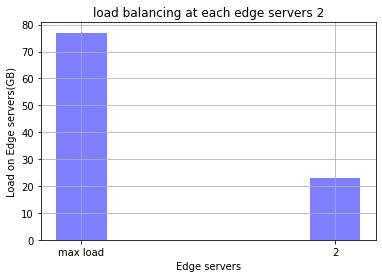

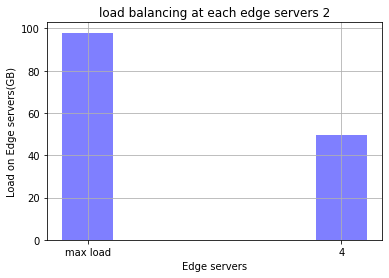

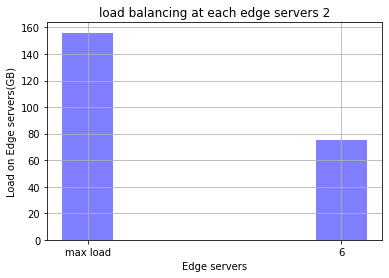

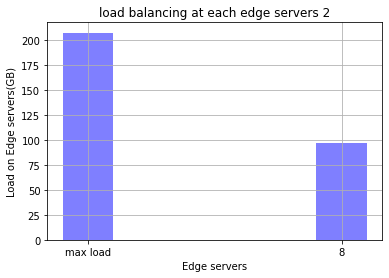

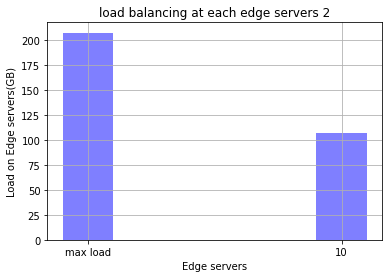

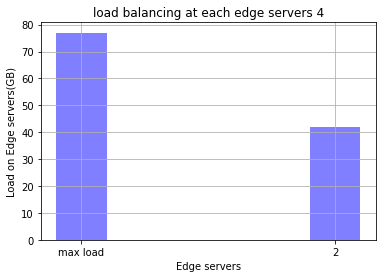

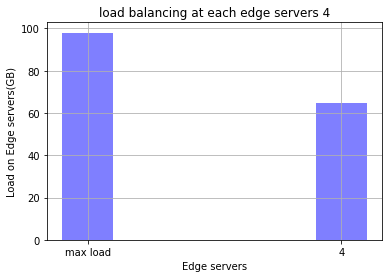

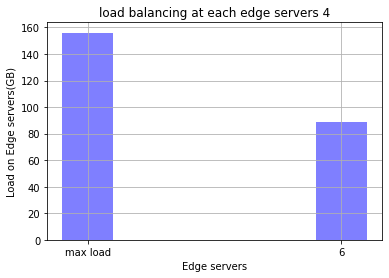

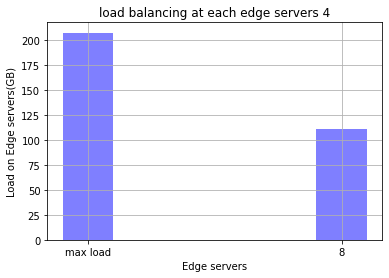

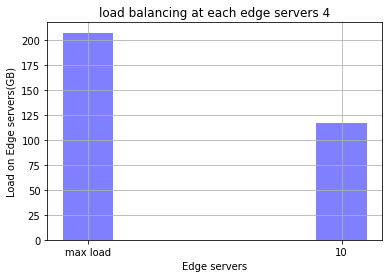

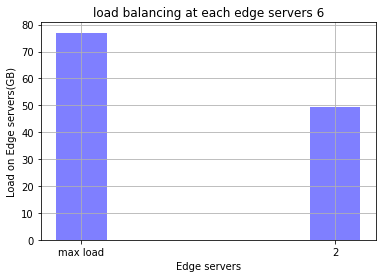

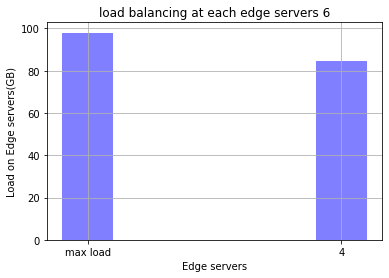

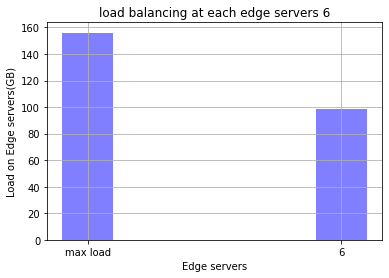

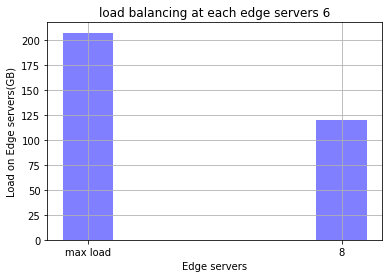

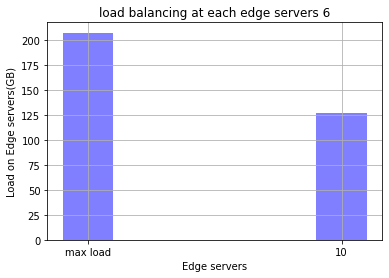

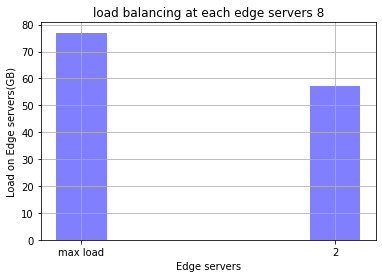

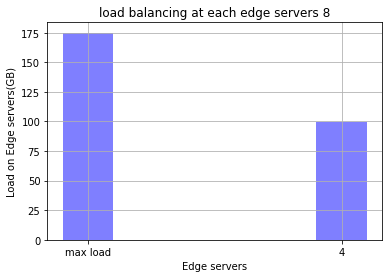

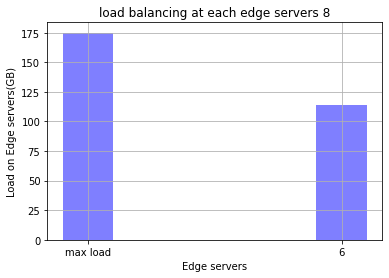

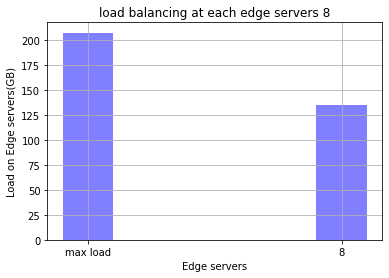

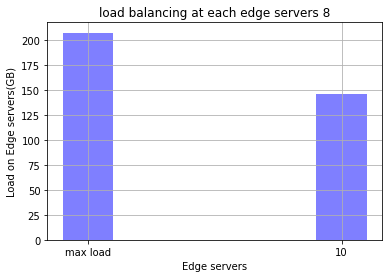

IndexError: ignored

In [29]:
loadedge  = int(input('enter the load limit of edge devices: '))
lim = int(input('enter the radius limit: '))

#edges = int(input("enter number of Edge servers between 2 to 10: "))
#iot = int(input("enter number of IoT devices between 2 to 10: "))

num = 10       #this num is taking num of times the for loop


loadiot = np.loadtxt("loadiot.npy")

for ed in range(2, num+1, +2):
  edges = ed
  for io in range(2, num+1, +2):
    iot = io
    avg1 = []
    for abc in range(num):
      edgeco = np.loadtxt("edgefile%s.npy" %abc)

      iotco  = np.loadtxt("iotfile%s.npy" %abc)

      avg1.append(loadbal(edgeco, iotco, edges, iot, loadiot))

    dict2 = {}
    dict2["max load"] = max(avg1)
    ld = sum(avg1)
    dict2["%s" %iot] = ld/num
    x = dict2.keys()
    y = dict2.values()
    plt.grid()
    plt.xlabel("Edge servers")
    plt.ylabel("Load on Edge servers(GB)")
    plt.title("load balancing at each edge servers %s" %edges)
    plt.bar(x,y, color='blue', width=0.2, alpha=0.5)
    plt.show()